## Introduction

Predicting hotel reservation cancellations is a critical aspect of hotel revenue management. The rise of online booking platforms has given customers the flexibility to easily book and cancel reservations, leading to significant fluctuations in hotel occupancy rates. While this flexibility benefits customers, it poses challenges for hotels in terms of revenue management, resource allocation, and customer service.

This project aims to address these challenges by developing a machine learning model that can accurately predict hotel reservation cancellations. By analyzing historical booking data, including various features such as booking lead time, customer demographics, and booking details, the model can identify patterns and factors that contribute to reservation cancellations. This predictive capability allows hotels to implement proactive measures to reduce cancellations, optimize occupancy rates, and enhance overall operational efficiency.

## Objective

The primary objectives of this project are as follows:

1. **Data Exploration and Visualization**:
   - Gain insights into the distribution and relationships of various features within the hotel reservation dataset.
   - Identify key factors that influence the likelihood of reservation cancellations through visualizations and statistical analysis.

2. **Data Preprocessing**:
   - Clean and preprocess the dataset to ensure it is suitable for modeling.
   - Handle missing values, encode categorical variables, and standardize numerical features to prepare the data for machine learning algorithms.

3. **Model Development**:
   - Develop and train multiple machine learning models, including Decision Tree Classifier, Random Forest Classifier, and Logistic Regression, to predict reservation cancellations.
   - Use techniques such as hyperparameter tuning and cross-validation to optimize model performance.

4. **Model Evaluation**:
   - Evaluate the performance of the trained models using metrics such as accuracy, precision, recall, and F1-score.
   - Compare the models to identify the best-performing model for predicting reservation cancellations.

5. **Implementation and Usage**:
   - Implement the best-performing model to predict cancellations for new reservations.
   - Provide actionable insights and recommendations for hotel management to reduce cancellation rates and optimize revenue.

## Dataset

The dataset used for this project is the "Hotel Reservations Data" available on Kaggle. It contains detailed information on hotel reservations, including features such as:
- Booking ID
- Number of adults and children
- Duration of stay (weekend and weekday nights)
- Meal type
- Car parking space requirement
- Booking lead time
- Arrival details (year, month, date)
- Market segment
- Repeated guest flag
- Previous cancellations and bookings not canceled
- Average price per room
- Number of special requests
- Booking status (canceled or not)

The dataset can be accessed and downloaded from the following link: [Kaggle Hotel Reservations Data](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset).

**Install Required Packages**:

   - To enhance the functionality of the CTPO environment, you may need to install some libraries not pre-installed but required for this notebook. Follow these steps to install the necessary libraries from the `requirements.txt` file:

   **2.1 Create and Activate the Virtual Environment:**
   
   Open your terminal or command prompt within the jupyter notebook. `File -> New -> Terminal`
   
   Navigate to the project directory where you want to set up the environment.
   
   Execute the following commands to create and activate the virtual environment:
   
   ```
   bash
   python3 -m venv --system-site-packages myvenv #myvenv is name of virtual environment you can change it
   source myvenv/bin/activate
   pip3 install ipykernel
   python -m ipykernel install --user --name=myvenv --display-name="Python (myvenv)"
   ```
   **2.2 Install Required Libraries**
   
   Before running the following command in jupyter notebook, make sure you are in the directory where the Jupyter Notebook and virtual environment is located. This ensures the ./ path is always current. You can use the cd command to change to your project directory and pwd to verify your current directory.
   
   ```
   !. ./myvenv/bin/activate; pip install -r requirements.txt

In [ ]:
!. ./myvenv/bin/activate; pip install -r requirements.txt

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
hotel_data= pd.read_csv('Hotel Reservations.csv')
hotel_data.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


# Statistical Summary of dataset

In [39]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [40]:
hotel_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


From the information above, we can conclude that `required_car_parking_space`, `repeated_guest`, and `no_of_special_requests` are categorical columns, although they have been read as integers. Therefore, we will first convert them into categorical data types.

In [41]:
# Converting datatype of columns
hotel_data['required_car_parking_space']= hotel_data['required_car_parking_space'].astype('category')
hotel_data['repeated_guest']= hotel_data['repeated_guest'].astype('category')
hotel_data['no_of_special_requests']= hotel_data['no_of_special_requests'].astype('category')
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  object  
 6   required_car_parking_space            36275 non-null  category
 7   room_type_reserved                    36275 non-null  object  
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

From `describe we can notice that minimum average price of room is zero so we will replace it with average

In [42]:
hotel_data['avg_price_per_room'].replace(0,hotel_data['avg_price_per_room'].mean(),inplace=True)

In [43]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [44]:
hotel_data['date of arrival'] = hotel_data['arrival_year'].astype(str) + '-' + hotel_data['arrival_month'].astype(str) + '-' + hotel_data['arrival_date'].astype(str)

hotel_data['date of arrival'] = pd.to_datetime(hotel_data['date of arrival'], errors='coerce')


In [45]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


# Exploratory Data Analysis

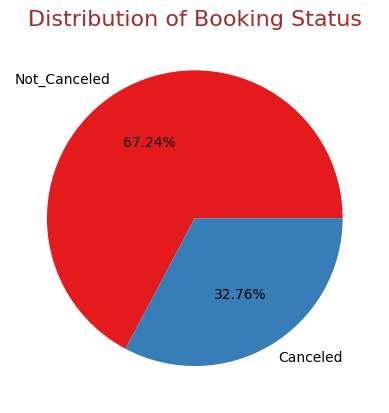

In [46]:
#1. 
set1_palette = plt.get_cmap('Set1')

color=[set1_palette(0)  ,set1_palette(1) ]
plt.pie(hotel_data['booking_status'].value_counts(),autopct='%1.2f%%',labels=hotel_data['booking_status'].unique(), colors = color)
plt.title('Distribution of Booking Status', fontsize=16,loc='center',color='Brown')
plt.show()

- The pie chart shows that a significant majority of bookings, 67.24%, are not canceled, while 32.76% are canceled, highlighting a relatively high booking retention rate at the hotel.

Text(0.5, 1.0, 'Number of Children')

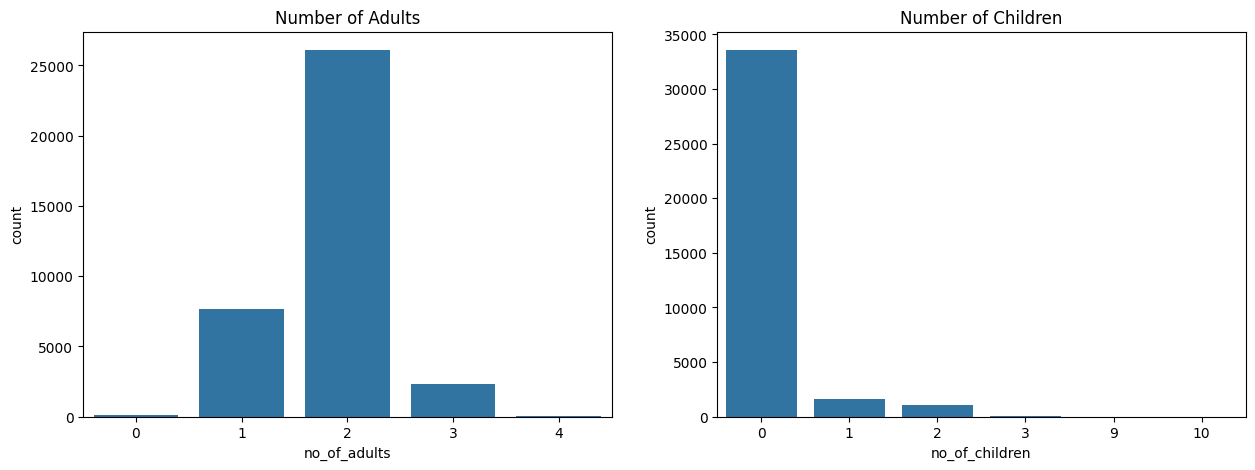

In [47]:
#2. Guest information

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = hotel_data, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = hotel_data, ax=ax[1]).set_title('Number of Children')

- The majority of bookings are made by groups with two adults, with a significantly lower number of bookings for groups with one or three adults.
- Most bookings involve no children, with a steep drop-off for bookings with one or more children, indicating that families without children or with fewer children are more common among the hotel's guests.

Text(0.5, 1.0, 'Number of Week Nights')

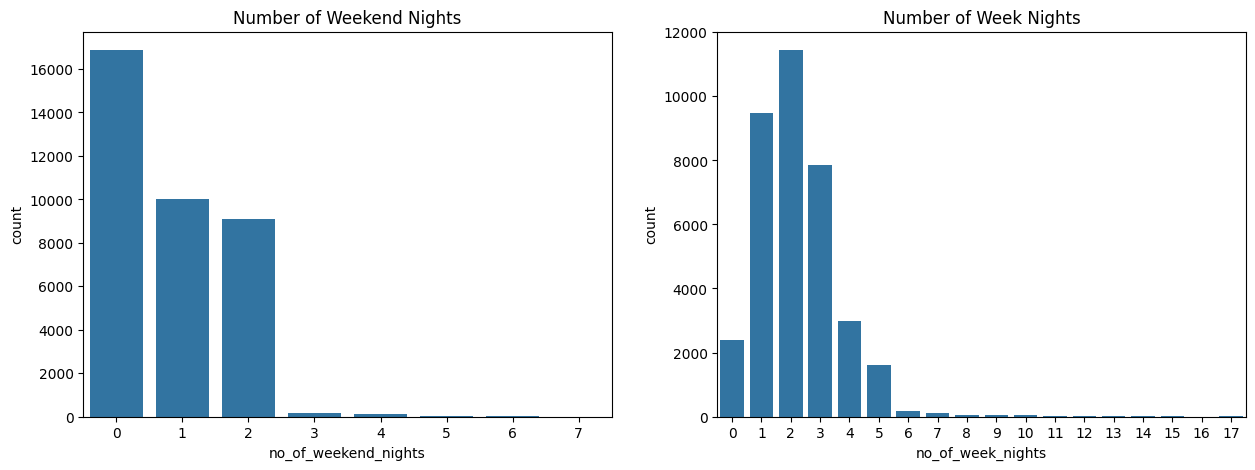

In [48]:
#3. Time Spent at Hotel

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = hotel_data, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = hotel_data, ax=ax[1]).set_title('Number of Week Nights')

- The majority of bookings are for stays that do not include any weekend nights, followed by bookings with one or two weekend nights, indicating a preference for weekday stays or shorter weekend getaways.
- For weeknights, most bookings are for stays of one to four nights, with two nights being the most common, suggesting that guests typically prefer shorter stays during the week.

Text(0.5, 1.0, 'Day of week of arrival')

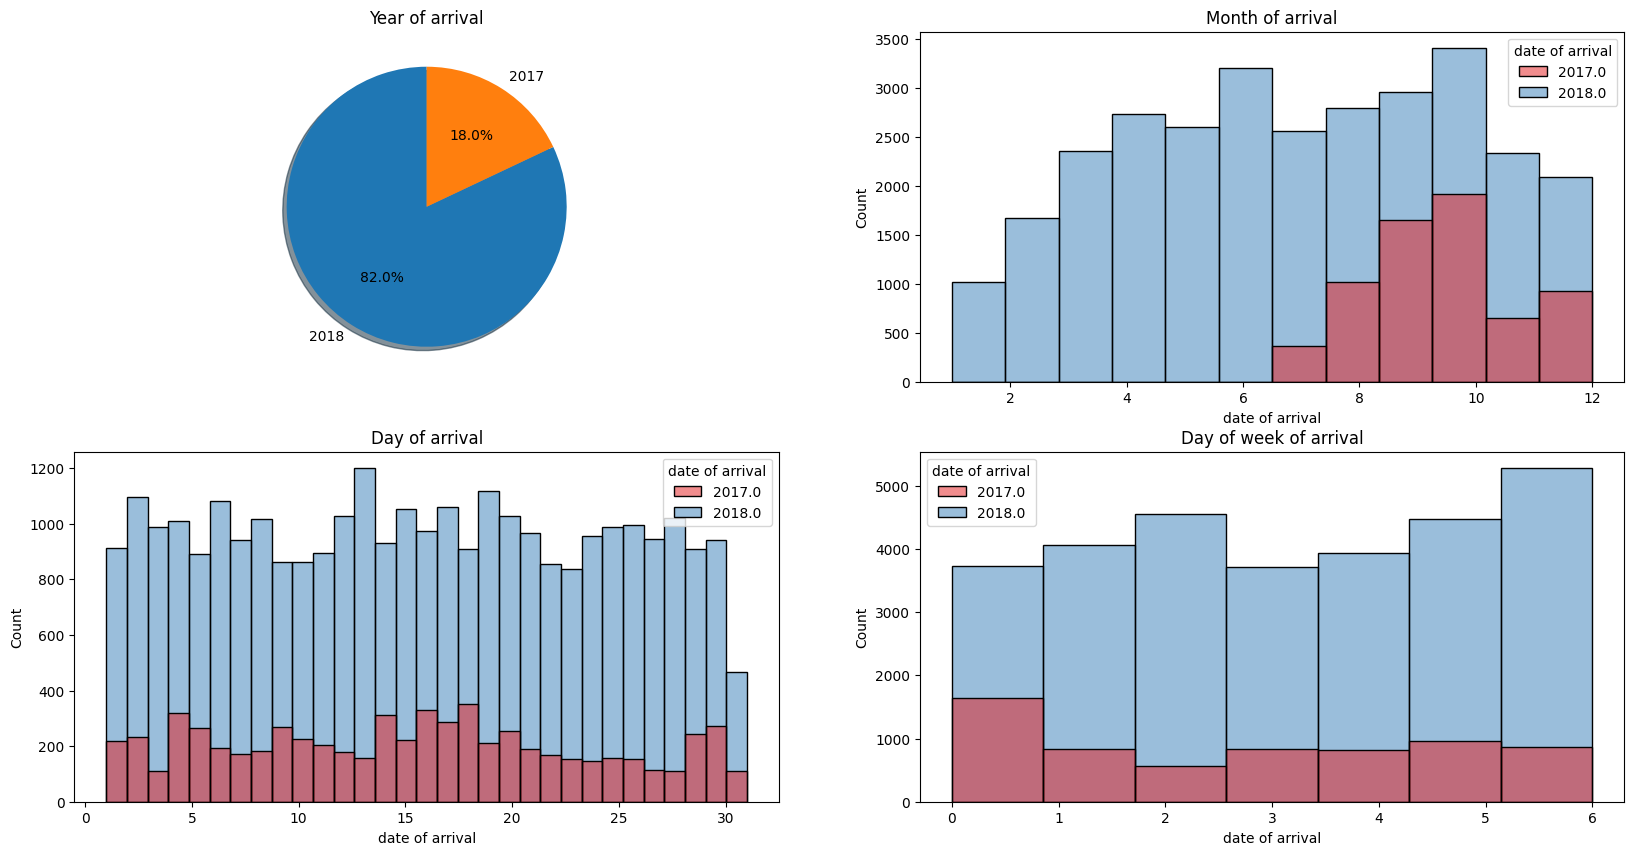

In [49]:
#4. Date of arrival

fig, ax = plt.subplots(2,2,figsize=(20,10))

#year of arrival
ax[0,0].pie(hotel_data['date of arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')

#month of arrival   
sns.histplot(x = hotel_data['date of arrival'].dt.month, ax=ax[0,1], bins=12, hue = hotel_data['date of arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')

#day of arrival
sns.histplot(x = hotel_data['date of arrival'].dt.day, ax=ax[1,0], bins=31, hue = hotel_data['date of arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')

#day of week of arrival
sns.histplot(x = hotel_data['date of arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = hotel_data['date of arrival'].dt.year, palette = 'Set1').set_title('Day of week of arrival')

- **Year of arrival**: The majority of arrivals occurred in 2018, accounting for 82% of the total, while only 18% of arrivals were in 2017.
- **Month of arrival**: Arrivals are fairly evenly distributed throughout the months, with noticeable peaks in the middle and towards the end of the year, particularly in August and October.
- **Day of arrival**: Arrivals are relatively evenly spread across the days of the month, with a slight increase in arrivals around the middle of the month.
- **Day of week of arrival**: Most arrivals occur on Fridays (day 5), indicating a preference for starting stays towards the weekend, with fewer arrivals on Mondays (day 0) and Tuesdays (day 1).

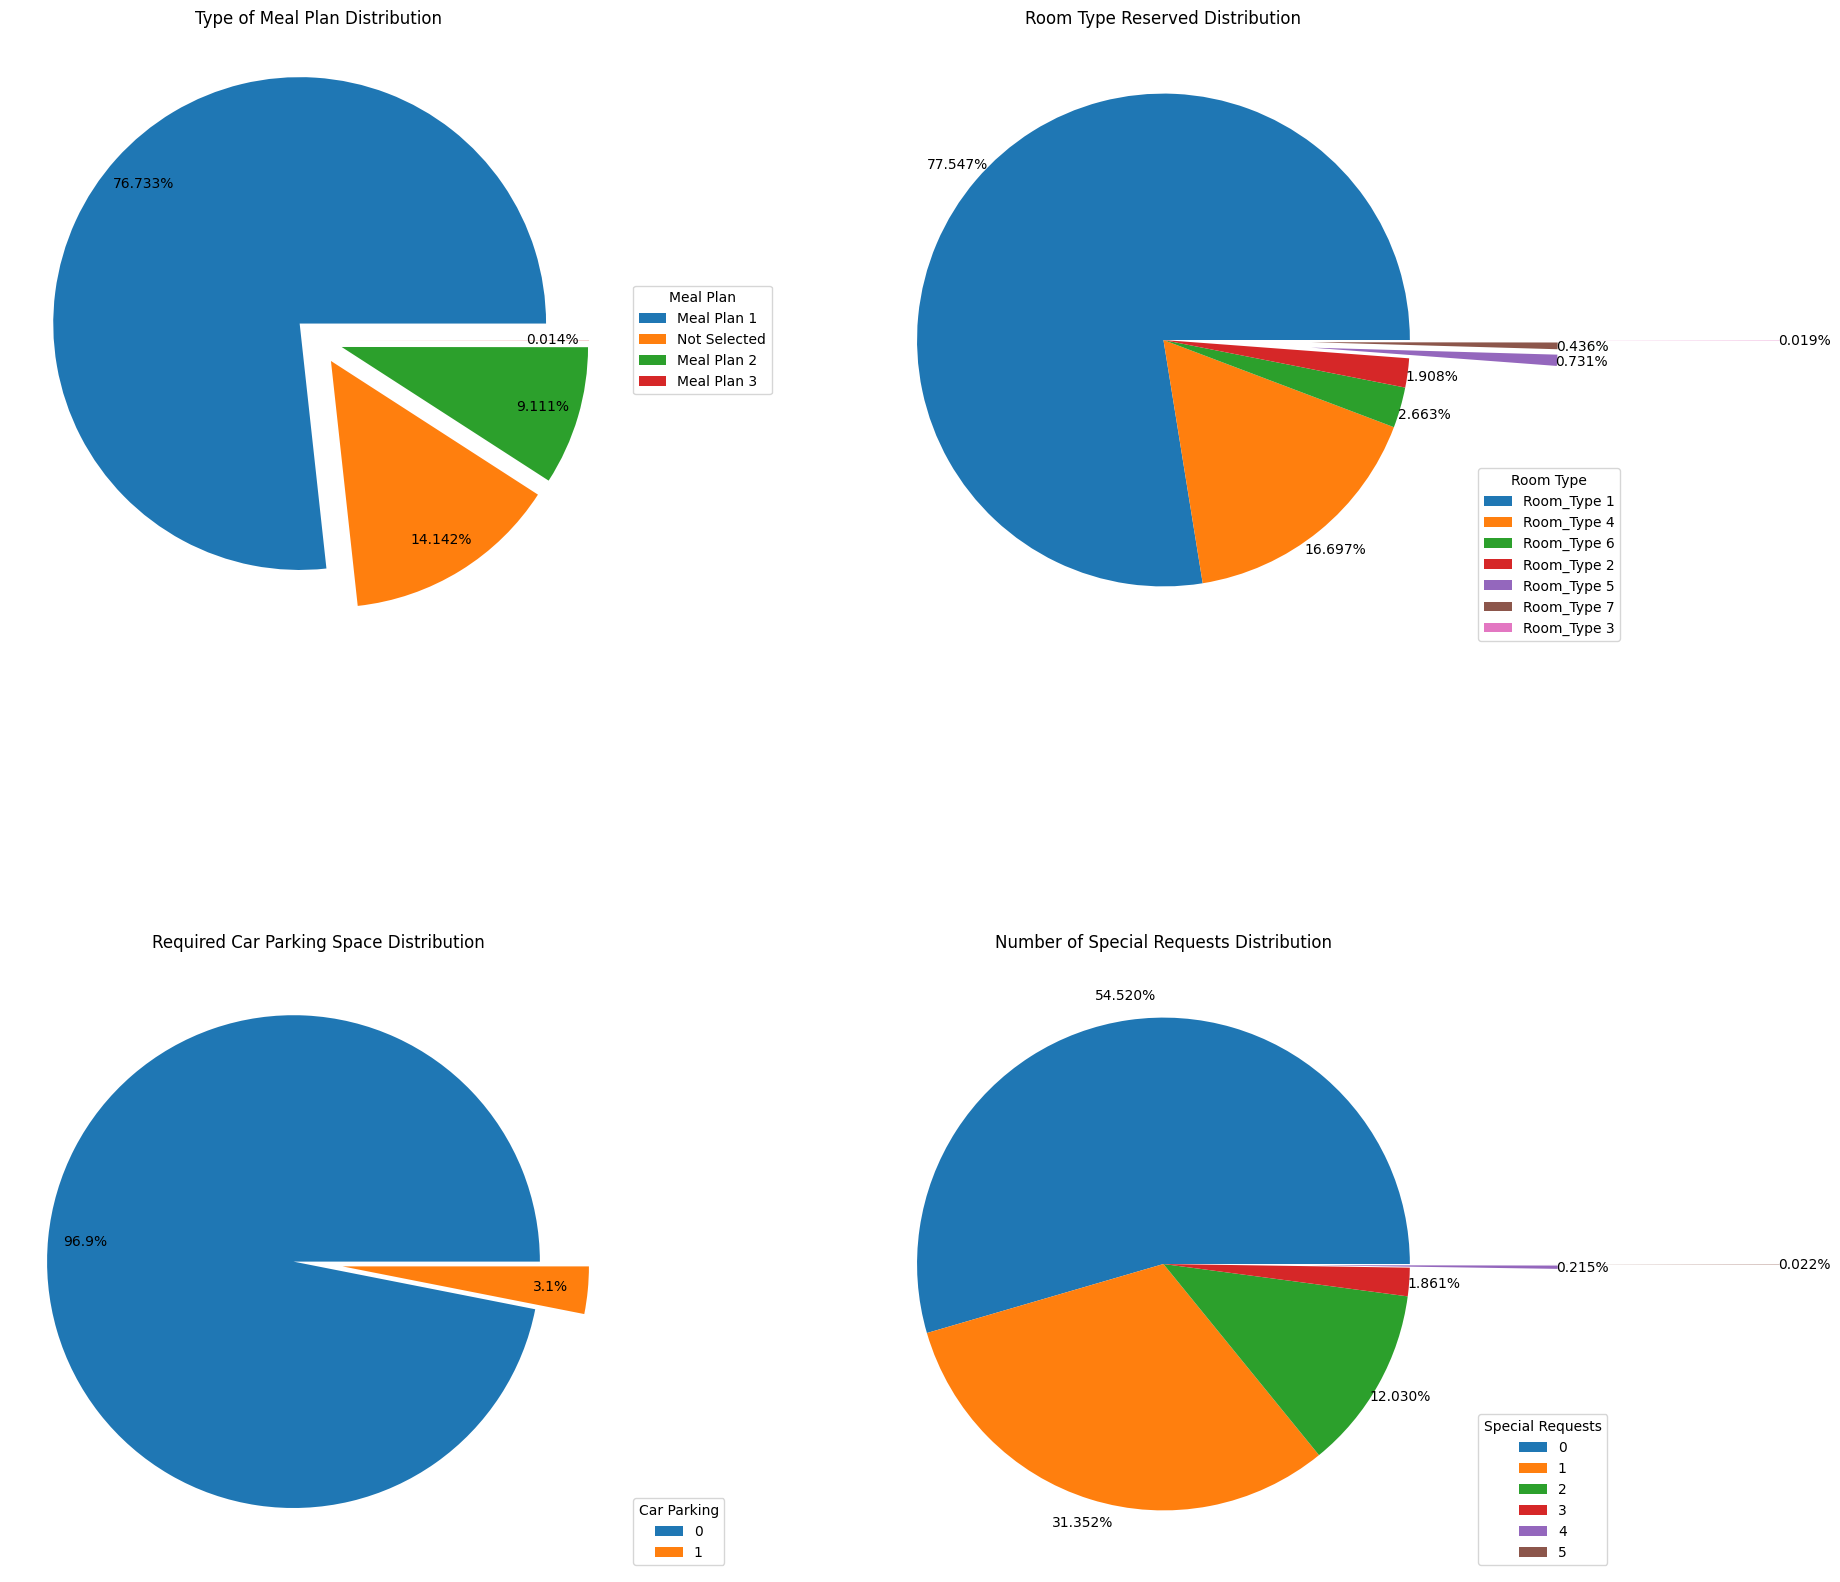

In [50]:
#5. Services

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Pie chart for type_of_meal_plan
meal_plan_counts = hotel_data['type_of_meal_plan'].value_counts()
explode_meal_plan = [0.1] * len(meal_plan_counts)  # Adjust the length based on number of categories
wedges, texts, autotexts = ax[0, 0].pie(meal_plan_counts, autopct='%1.3f%%', explode=explode_meal_plan, pctdistance=0.85)
ax[0, 0].set_title('Type of Meal Plan Distribution')
ax[0, 0].legend(wedges, meal_plan_counts.index, title="Meal Plan", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for room_type_reserved
room_type_counts = hotel_data['room_type_reserved'].value_counts()
explode_room_type = [0, 0, 0, 0, 0.6, 0.6,1.5] 
wedges, texts, autotexts = ax[0, 1].pie(room_type_counts, autopct='%1.3f%%', explode=explode_room_type, pctdistance=1.1)
ax[0, 1].set_title('Room Type Reserved Distribution')
ax[0, 1].legend(wedges, room_type_counts.index, title="Room Type", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for required_car_parking_space
parking_counts = hotel_data['required_car_parking_space'].value_counts()
explode_parking = [0.1] * len(parking_counts)
wedges, texts, autotexts = ax[1, 0].pie(parking_counts, autopct='%1.1f%%', explode=explode_parking, pctdistance=0.85)
ax[1, 0].set_title('Required Car Parking Space Distribution')
ax[1, 0].legend(wedges, parking_counts.index, title="Car Parking", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for no_of_special_requests with adjusted explode values
requests_counts = hotel_data['no_of_special_requests'].value_counts()
explode_requests = [0, 0, 0, 0, 0.6, 1.5]  # Larger explode for categories 4 and 5
wedges, texts, autotexts = ax[1, 1].pie(requests_counts, autopct='%1.3f%%', explode=explode_requests, pctdistance=1.1)
ax[1, 1].set_title('Number of Special Requests Distribution')
ax[1, 1].legend(wedges, requests_counts.index, title="Special Requests", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


- **Type of Meal Plan Distribution**: The vast majority of guests (76.733%) select Meal Plan 1, with a smaller percentage opting for Meal Plan 2 (9.111%) and Meal Plan 3 (0.014%), while 14.142% of guests do not select any meal plan.
- **Room Type Reserved Distribution**: Room Type 1 is the most popular, reserved by 77.547% of guests, followed by Room Type 4 at 16.697%. Other room types have significantly lower reservation rates.
- **Required Car Parking Space Distribution**: Most guests (96.9%) do not require a car parking space, while only 3.1% of guests do.
- **Number of Special Requests Distribution**: More than half of the guests (54.520%) have no special requests, while 31.352% have one special request, and the remaining guests have two or more special requests.

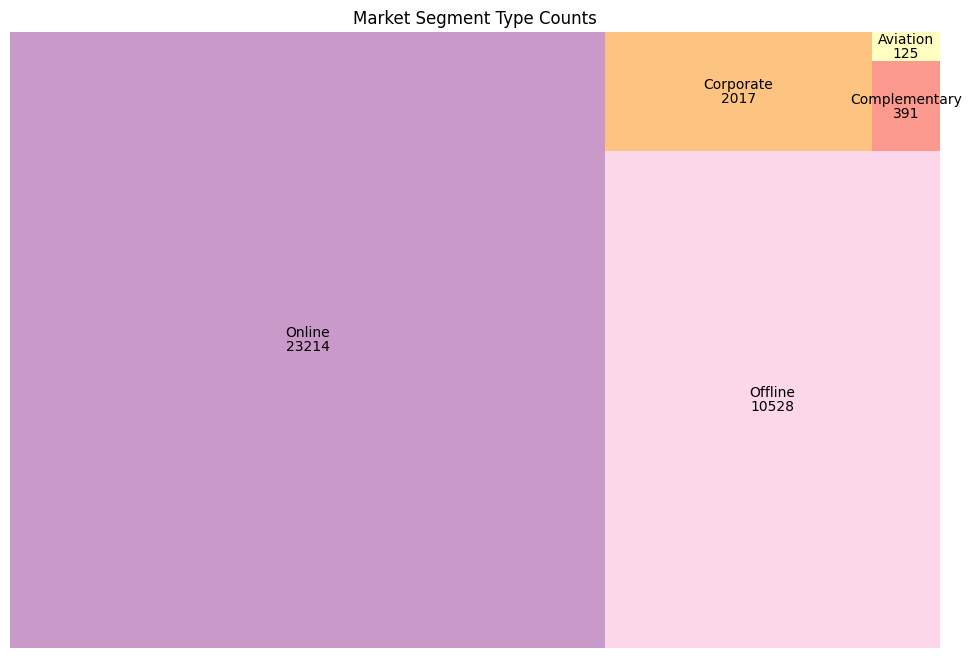

In [51]:
#6. Market Segment
import squarify
counts = hotel_data['market_segment_type'].value_counts().reset_index()
counts.columns = ['market_segment_type', 'counts']

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=counts['counts'], label=counts['market_segment_type'], alpha=.8, color=sns.color_palette("Set3_r", len(counts)),value=counts['counts'])
plt.axis('off')
plt.title('Market Segment Type Counts')
plt.show()

- The majority of bookings come from the online segment, which constitutes a significant portion (23,214) of the total bookings, followed by the offline segment (10,528), while corporate, complementary, and aviation segments account for a much smaller share.

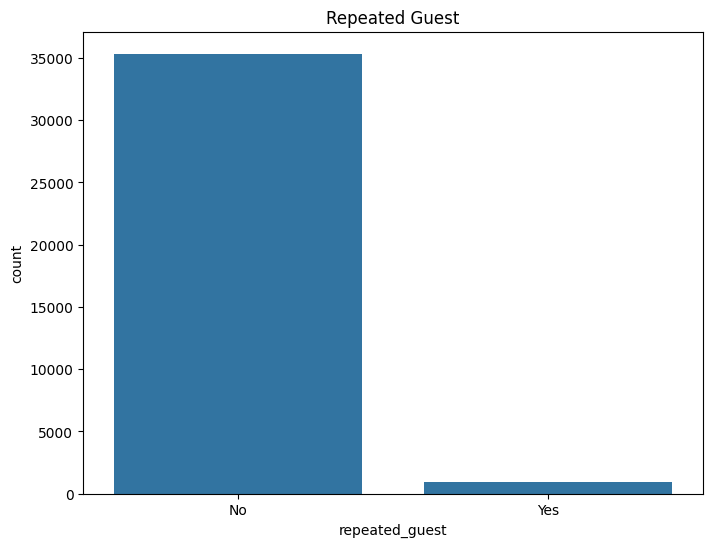

In [52]:
#7. 
x_labels=['No','Yes']
plt.figure(figsize=(8, 6))
sns.countplot(x='repeated_guest', data=hotel_data)
plt.title('Repeated Guest')
plt.xticks(hotel_data['repeated_guest'].unique(),x_labels)

plt.show()

- The vast majority of guests are not repeat visitors, indicating that most bookings are made by new guests rather than returning ones.

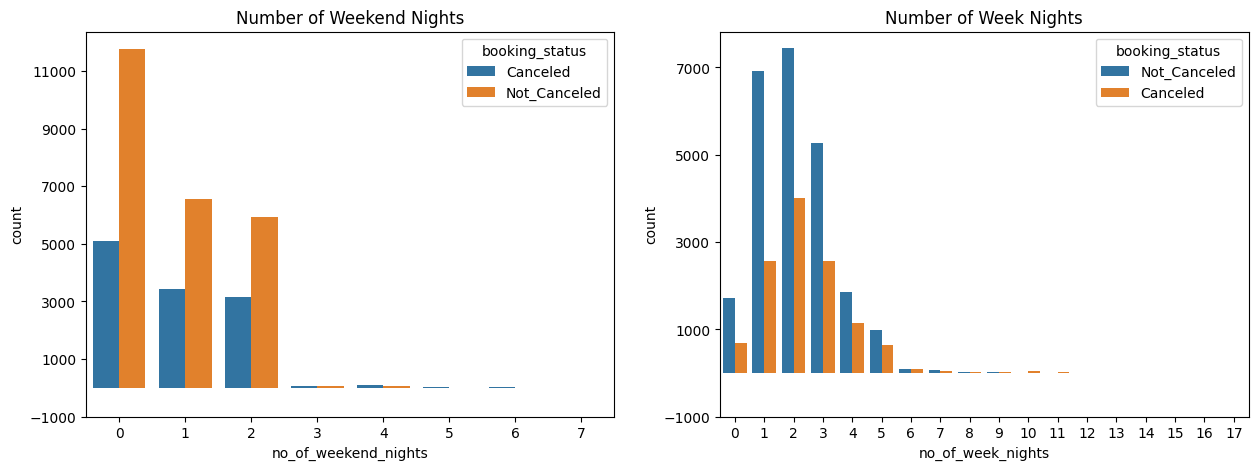

In [53]:
#8. 
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = hotel_data, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = hotel_data, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')
ax[0].set_yticks(range(-1000, int(ax[0].get_ylim()[1]) + 1, 2000))
ax[1].set_yticks(range(-1000, int(ax[1].get_ylim()[1]) + 1, 2000))


- **Number of Weekend Nights**: Bookings without any weekend nights have a higher cancellation rate compared to those with one or more weekend nights, suggesting that weekend stays might be less prone to cancellation.
- **Number of Week Nights**: Stays of one to three weeknights are more likely to be not canceled, whereas stays longer than four weeknights show a higher cancellation rate, indicating that shorter stays during the week are more stable.

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

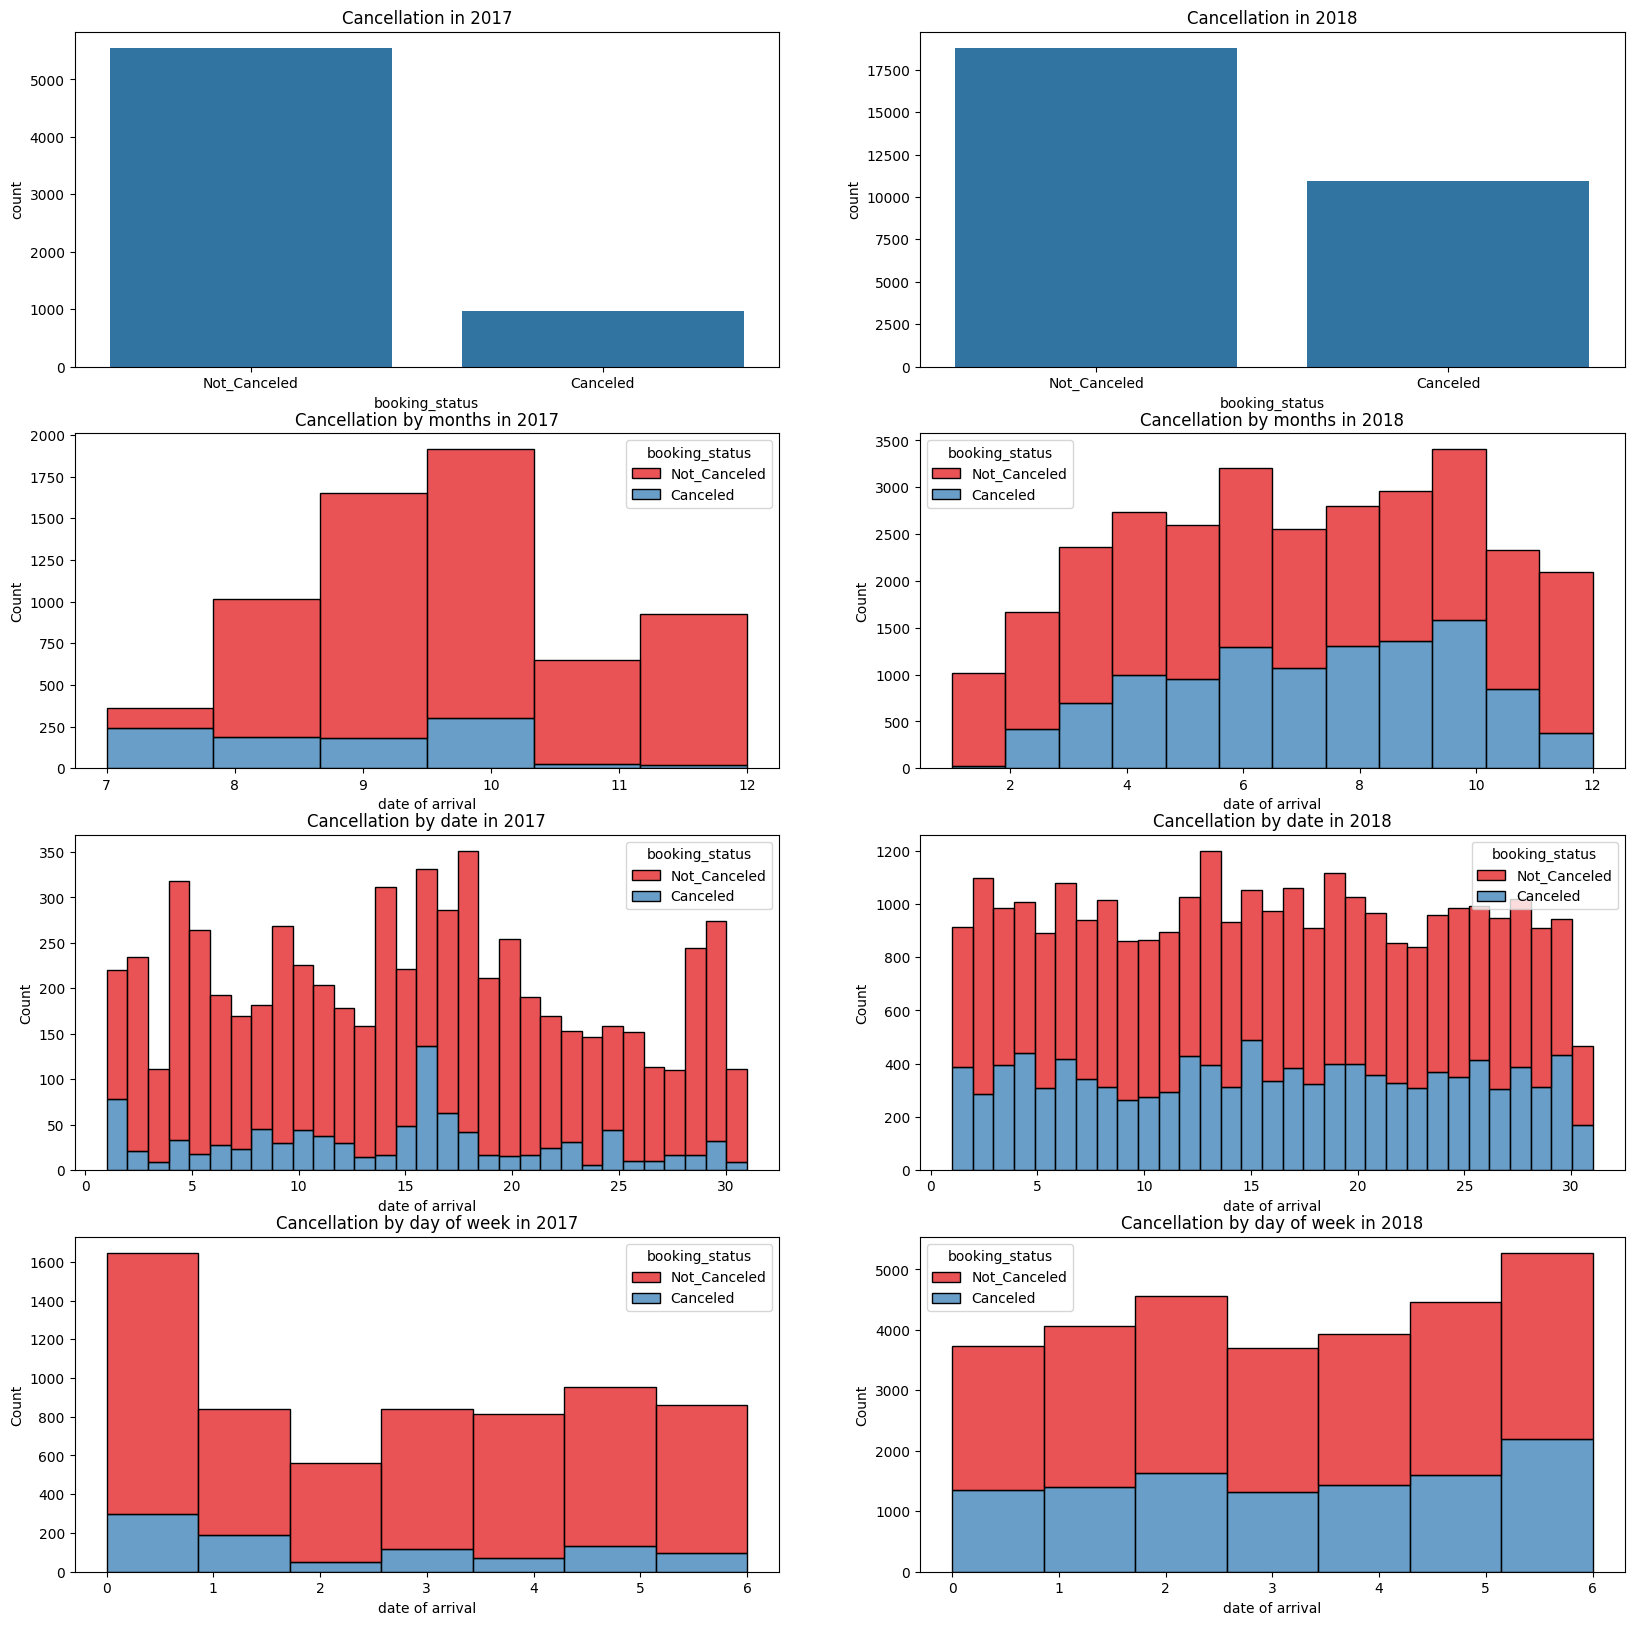

In [54]:
#9.

fig,ax = plt.subplots(4,2,figsize=(20,20))
df_2017 = hotel_data[hotel_data['date of arrival'].dt.year == 2017]
df_2018 = hotel_data[hotel_data['date of arrival'].dt.year == 2018]

#year wise
sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')

#month wise
sns.histplot(x = df_2017['date of arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')

#date wise
sns.histplot(x = df_2017['date of arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by date in 2018')

#day of week wise
sns.histplot(x = df_2017['date of arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')

- **Cancellation in 2017**: The majority of bookings in 2017 were not canceled, with a significantly lower number of cancellations observed.
- **Cancellation in 2018**: Similarly, most bookings in 2018 were not canceled, though the number of cancellations is higher compared to 2017.
- **Cancellation by months in 2017**: The number of cancellations increases towards the later months of the year, with September and October showing the highest rates of cancellations.
- **Cancellation by months in 2018**: Cancellations are more evenly distributed throughout the year in 2018, with slight peaks in March, July, and September.
- **Cancellation by date in 2017**: Cancellations in 2017 are spread across the month, with a higher concentration around the middle of the month.
- **Cancellation by date in 2018**: In 2018, cancellations are relatively evenly distributed throughout the month, with no significant peaks.
- **Cancellation by day of week in 2017**: Cancellations are higher towards the beginning of the week, particularly on Mondays.
- **Cancellation by day of week in 2018**: The pattern of cancellations in 2018 shows higher cancellations towards the end of the week, especially on Fridays and Saturdays.

Text(0.5, 1.0, 'Average Room Price')

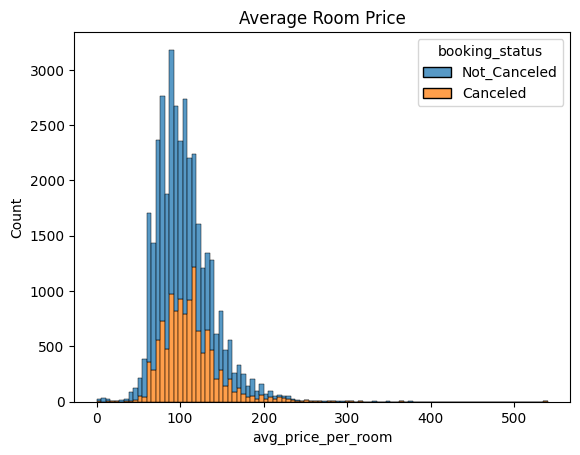

In [55]:
#10. Avg. room price
sns.histplot(x = 'avg_price_per_room', data = hotel_data, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

- Bookings with lower average room prices (around $50 to $150) have a higher likelihood of being not canceled, while cancellations are more frequent for bookings with room prices in a similar range, though less so as prices increase. This suggests that moderate pricing is a key factor in booking stability.

# Data Preprocessing:


In [56]:
# Data Preprocessing:

#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = hotel_data[cols].quantile(0.25)
Q3 = hotel_data[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
hotel_data = hotel_data[~((hotel_data[cols] < (Q1 - 1.5 * IQR)) |(hotel_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
# label Encoding:

from sklearn.preprocessing import LabelEncoder
#label encoding object
le = LabelEncoder()

#columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

#label encoding
for col in cols:
    le.fit(hotel_data[col])
    hotel_data[col] = le.transform(hotel_data[col])
    print(col, hotel_data[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 1 5 4 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hotel_data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(hotel_data[['lead_time', 'avg_price_per_room']])

# Correlation Matrix

/tmp/ipykernel_6540/1067136022.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

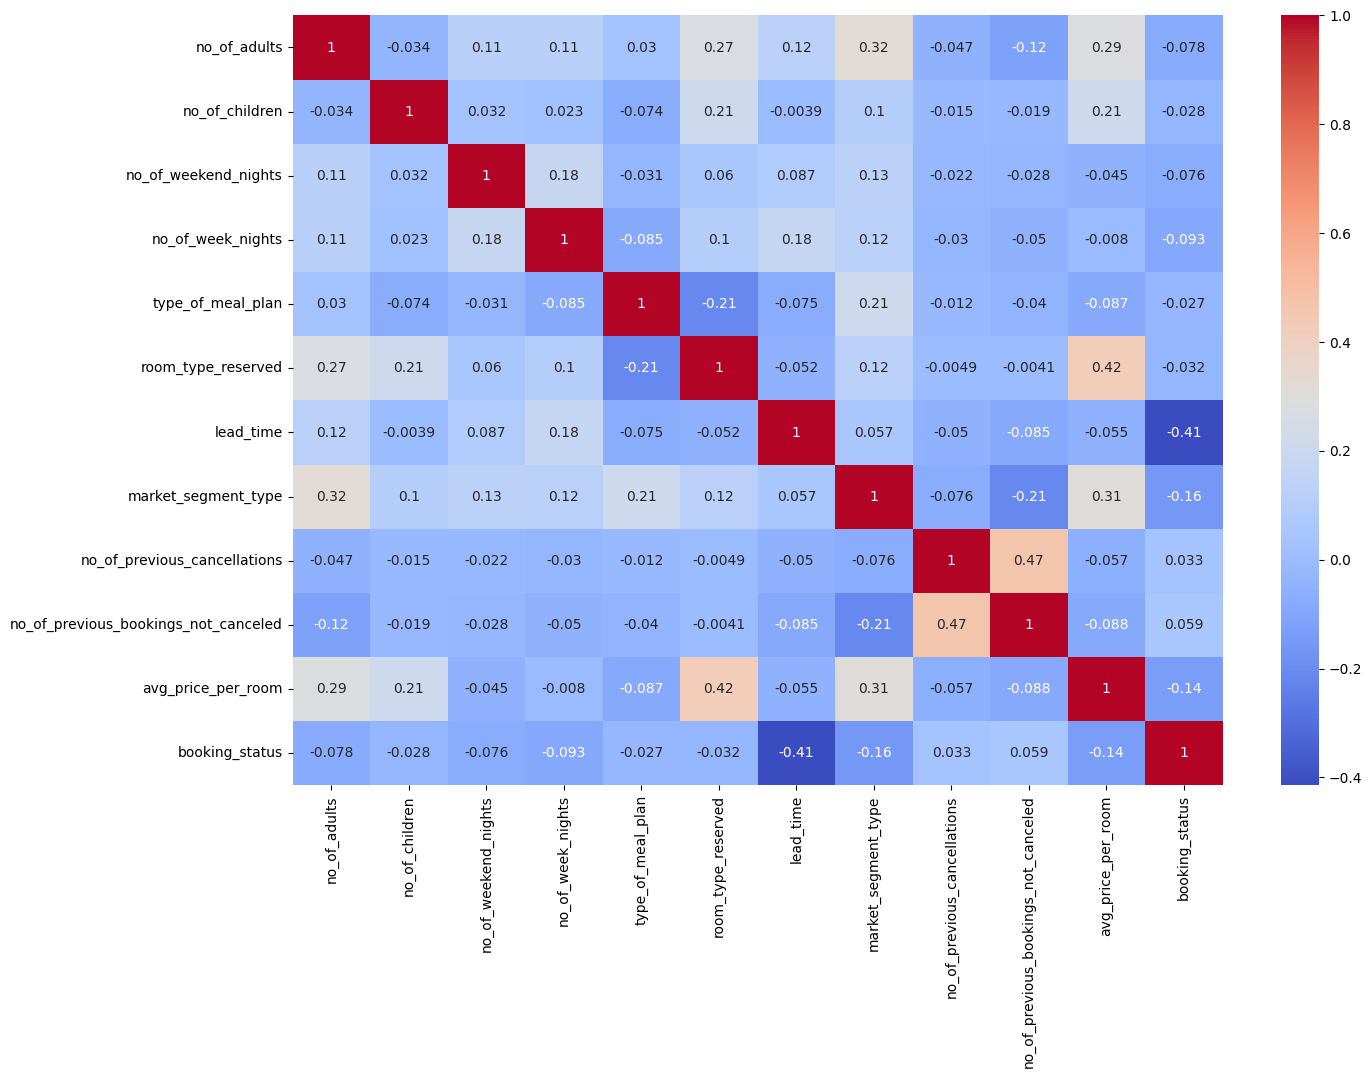

In [59]:
plt.figure(figsize=(15,10))
data=hotel_data[['no_of_adults',	'no_of_children',	'no_of_weekend_nights',	'no_of_week_nights',	'type_of_meal_plan',	'required_car_parking_space',	'room_type_reserved',	'lead_time',	'market_segment_type',	'repeated_guest',	'no_of_previous_cancellations',	'no_of_previous_bookings_not_canceled',	'avg_price_per_room',	'no_of_special_requests',	'booking_status']]
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('booking_status', axis=1), data['booking_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

In [61]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#decision tree classifier Object
dtree = DecisionTreeClassifier()
#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [62]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.8539916355157482


In [63]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}
0.8471816129390429


In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [65]:
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
l_pred = logreg.predict(X_test)

0.7955512787297827


## Model Evaluation

Text(0.5, 1.0, 'Logistic Regression')

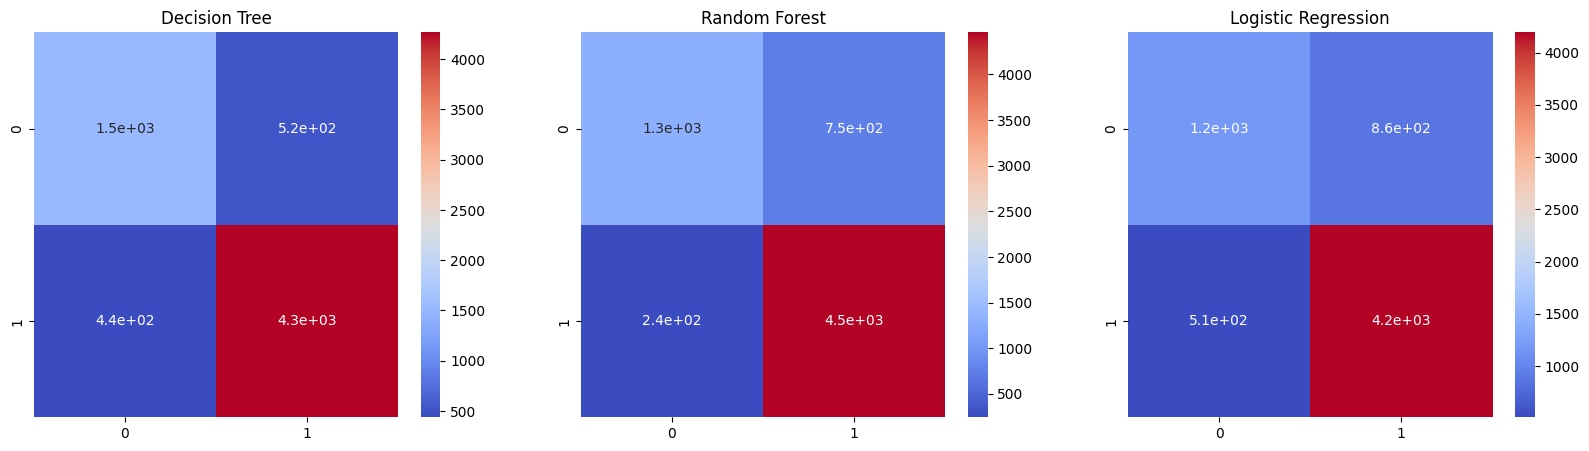

In [66]:
# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')
#random forest
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')
#logistic regression
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

- **Decision Tree**: The confusion matrix shows that the decision tree model has a high number of true positives and true negatives, indicating it is relatively good at distinguishing between cancellations and non-cancellations, but there are still some false positives and false negatives.
- **Random Forest**: The random forest model shows improved accuracy with a higher number of true positives and true negatives compared to the decision tree, reducing the number of false positives and false negatives, suggesting better performance in predicting cancellations.
- **Logistic Regression**: The logistic regression model has a comparable number of true positives and true negatives to the decision tree and random forest, but with slightly more false positives and false negatives, indicating it is less effective at predicting cancellations compared to the random forest model.

/tmp/ipykernel_6540/1325687030.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
/tmp/ipykernel_6540/1325687030.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, ax=ax[0], hist = False)
/tmp/ipykernel_6540/13

<Axes: title={'center': 'Logistic Regression'}, xlabel='booking_status', ylabel='Density'>

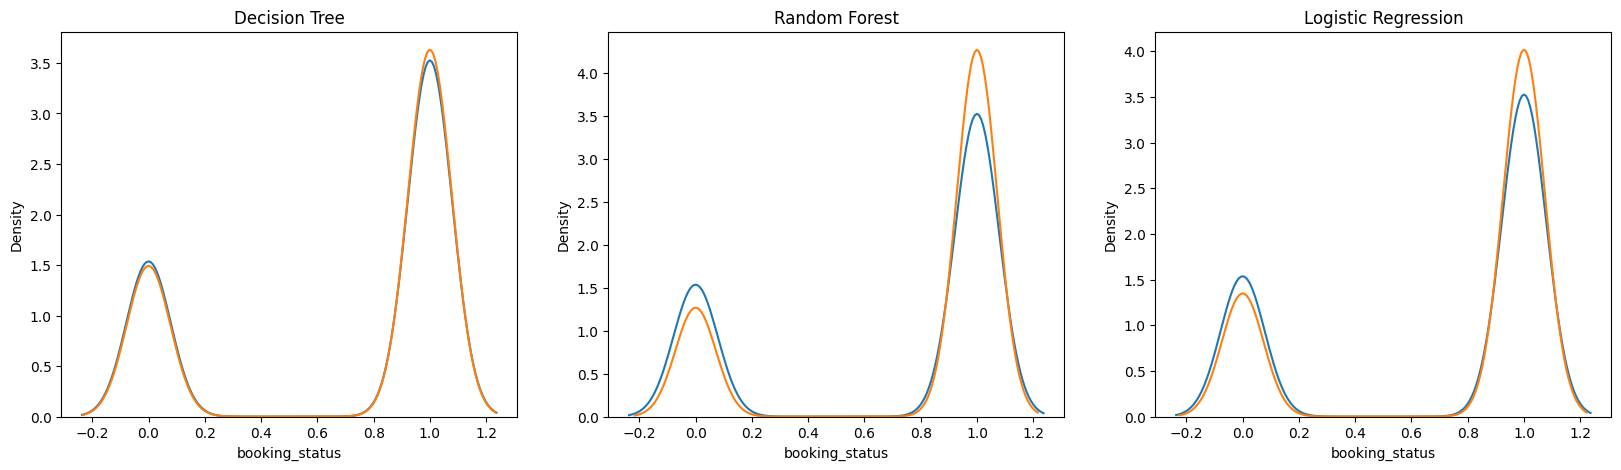

In [67]:
# Distribution Plot

fig, ax  = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
sns.distplot(d_pred, ax=ax[0], hist = False)

#random forest
sns.distplot(y_test, ax=ax[1], hist= False).set_title('Random Forest')
sns.distplot(r_pred, ax=ax[1], hist = False)

#logistic regression
sns.distplot(y_test, ax=ax[2], hist= False).set_title('Logistic Regression')
sns.distplot(l_pred, ax=ax[2], hist = False)

- **Decision Tree**: The density plot indicates that the decision tree model has a slight overlap between the densities of canceled and not-canceled bookings, showing that the model is fairly accurate but has some misclassification.
- **Random Forest**: The random forest model displays more distinct peaks for canceled and not-canceled bookings, indicating a better separation and higher accuracy in classification compared to the decision tree.
- **Logistic Regression**: The logistic regression model also shows distinct density peaks, but with more overlap than the random forest model, suggesting that it is less accurate in distinguishing between canceled and not-canceled bookings.

In [68]:
# Classification report

from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2050
           1       0.89      0.91      0.90      4705

    accuracy                           0.86      6755
   macro avg       0.83      0.83      0.83      6755
weighted avg       0.86      0.86      0.86      6755

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      2050
           1       0.86      0.95      0.90      4705

    accuracy                           0.85      6755
   macro avg       0.85      0.79      0.81      6755
weighted avg       0.85      0.85      0.85      6755

Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      2050
           1       0.83      0.89      0.86      4705

    accuracy                           0.80      6755
   macro avg       0.76      0.74      0.75      6755
weighted avg       0.79   

In [69]:
# Model Metrics

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#decision tree
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

Decision Tree
Accuracy Score:  0.8580310880829015
Mean Absolute Error:  0.14196891191709846
Mean Squared Error:  0.14196891191709846


Random Forest
Accuracy Score:  0.8535899333826795
Mean Absolute Error:  0.1464100666173205
Mean Squared Error:  0.1464100666173205


Logistic Regression
Accuracy Score:  0.7965951147298298
Mean Absolute Error:  0.20340488527017025
Mean Squared Error:  0.20340488527017025


Text(0.5, 1.0, 'Mean Squared Error')

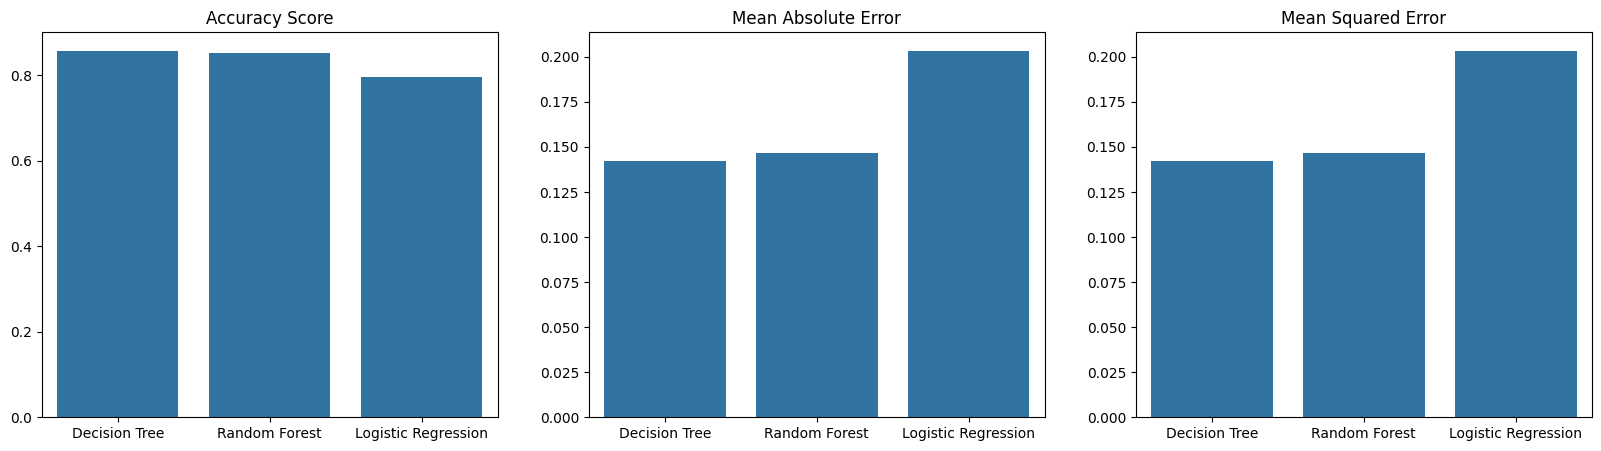

In [70]:
# Model comparission

fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

- **Accuracy Score** The random forest model has the highest accuracy score among the three models, followed closely by the decision tree, with logistic regression having the lowest accuracy.
- **Mean Absolute Error**: The decision tree model has the lowest mean absolute error, indicating better performance in predicting cancellations accurately, while the logistic regression has the highest error.
- **Mean Squared Error**: The decision tree model also shows the lowest mean squared error, reinforcing its superior prediction accuracy compared to the random forest and logistic regression models, with logistic regression having the highest error.

Text(0.5, 1.0, 'Decision Tree')

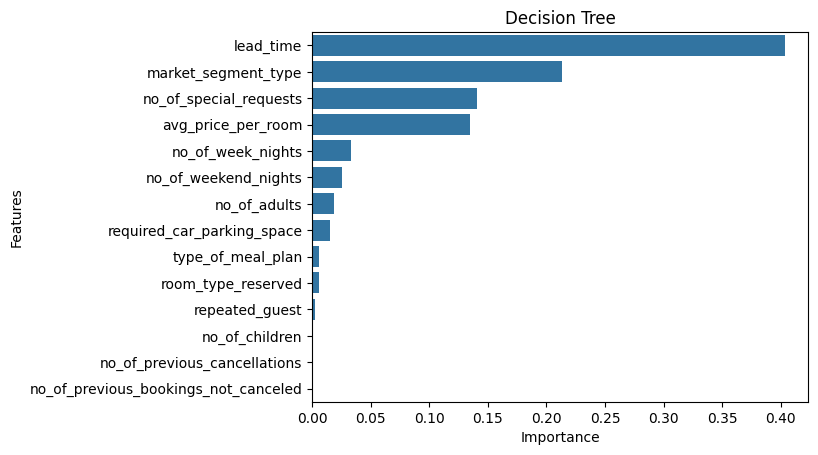

In [71]:
# Feature Importance:
#decision tree
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

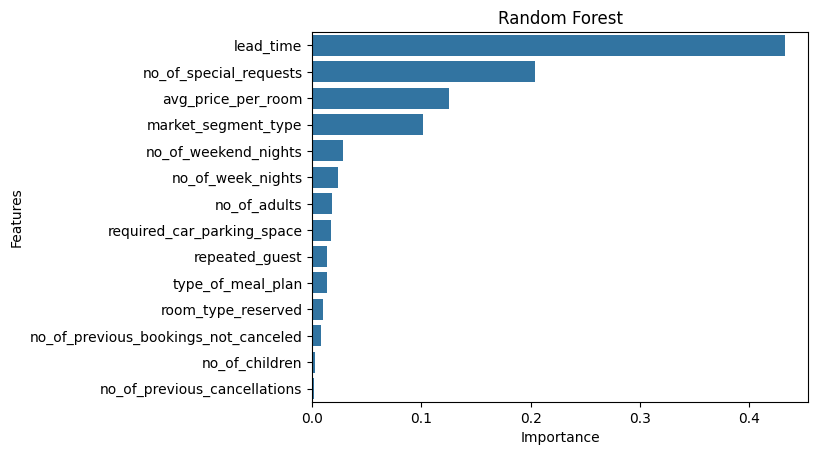

In [72]:
#random forest
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')